In [46]:
import h5py

# Open the HDF5 file and inspect the structure
with h5py.File("Z:/AION/Data/2024/11/13/nb_0A_all_bias_0A/data_22_00_13_13_11_2024.h5", 'r') as f:
    def print_hdf5_structure(group, level=0):
        for key in group.keys():
            if isinstance(group[key], h5py.Group):
                print(" " * level, "Group:", key)
                print_hdf5_structure(group[key], level + 2)
            else:
                print(" " * level, "Dataset:", key)

    print_hdf5_structure(f)

 Dataset: horizontal camera bg
 Dataset: horizontal camera blue mot
 Dataset: horizontal camera red mot
 Dataset: parameters
 Dataset: vertical camera bg
 Dataset: vertical camera blue mot
 Dataset: vertical camera red mot


In [47]:
import h5py
import json  # Just in case the data is in JSON format

# Open the HDF5 file
with h5py.File("Z:/AION/Data/2024/11/13/nb_0A_all_bias_0A/data_22_00_13_13_11_2024.h5", 'r') as f:
    # Load the 'parameters' dataset
    parameters_data = f['parameters'][()]
    
    # Check the data type and content
    if isinstance(parameters_data, bytes):  # Likely a JSON string if it's in bytes
        parameters_dict = json.loads(parameters_data.decode('utf-8'))
        print("Parameters data as dictionary:", parameters_dict)
    else:
        print("Parameters data:", parameters_data)

Parameters data as dictionary: {'sequence_parameters': {'time_of_flight': 0.0, 'sequence_start_dead_time': 3.0, 'sequence_end_dead_time': 3.0}, 'blue_phase_ramping': {'blue_phase_nominal_frequency': 125000000.0, 'blue_phase_ramping_duration': 0.2, 'blue_phase_ramping_detuning_start': 0.0, 'blue_phase_ramping_detuning_end': 0.0, 'blue_phase_ramping_amplitude_start': 1.0, 'blue_phase_ramping_amplitude_end': 0.0, 'blue_phase_nominal_frequency_reset': 125000000.0, 'blue_ramping_amplitude_reset': 1.0, 'blue_phase_ramping_Bfield_start': 100.0, 'blue_phase_ramping_Bfield_end': 100.0, 'blue_phase_ramping_Bfield_voltage': 10.0}, 'broadband_fixed_phase': {'broadband_fixed_phase_duration': 0.7, 'broadband_fixed_phase_central_frequency': 349400000.0, 'broadband_fixed_phase_modulation_width': 5000000.0, 'broadband_fixed_phase_Bfield': 18.0, 'broadband_fixed_phase_dpaom_amplitude': 1.0, 'broadband_fixed_phase_dpaom_ramping_rate': 150000000000.0, 'broadband_fixed_phase_dpaom_ramping_mode': 1, 'broadb

In [48]:
# Assuming 'parameters_dict' is already loaded from the previous step
narrowband_fixed_phase_frequency = parameters_dict['narrowband_fixed_phase_single']['narrowband_fixed_phase_frequency']
print("narrowband_fixed_phase_frequency:", narrowband_fixed_phase_frequency)


narrowband_fixed_phase_frequency: 346400000.0


In [49]:
import h5py
import json

def get_narrowband_fixed_phase_frequency(file_path):
    """
    Extracts the 'narrowband_fixed_phase_frequency' parameter from the specified HDF5 file.

    Parameters:
        file_path (str): Path to the HDF5 file.

    Returns:
        float: The value of 'narrowband_fixed_phase_frequency', or None if not found.
    """
    try:
        with h5py.File(file_path, 'r') as f:
            # Load the 'parameters' dataset
            parameters_data = f['parameters'][()]
            
            # Decode if necessary
            if isinstance(parameters_data, bytes):
                parameters_dict = json.loads(parameters_data.decode('utf-8'))
            else:
                parameters_dict = parameters_data

            # Access 'narrowband_fixed_phase_frequency'
            return parameters_dict['narrowband_fixed_phase_single']['narrowband_fixed_phase_frequency']

    except KeyError as e:
        print(f"KeyError: {e}. Please check the structure of the HDF5 file.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
file_path = "Z:/AION/Data/2024/11/13/nb_0A_all_bias_0A/data_22_00_13_13_11_2024.h5"  # Replace with your actual file path
frequency = get_narrowband_fixed_phase_frequency(file_path)
if frequency is not None:
    print("narrowband_fixed_phase_frequency:", frequency)

narrowband_fixed_phase_frequency: 346400000.0


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


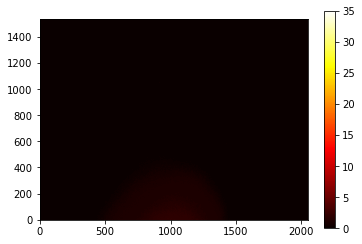

In [50]:
import h5py

# Open the HDF5 file
with h5py.File('Z:/AION/Data/2024/11/13/nb_0A_all_bias_0A/data_22_00_13_13_11_2024.h5', 'r') as f:
    # Extract the 'horizontal camera red mot' dataset
    horizontal_camera_red_mot_data = f['horizontal camera red mot'][()]

# Print the data to see what it looks like
print(horizontal_camera_red_mot_data)

# Display the data using matplotlib
plt.imshow(horizontal_camera_red_mot_data, cmap='hot', origin='lower')
plt.colorbar()

In [27]:
def extract_horizontal_camera_red_mot(file_path):

    # Open the HDF5 file
    with h5py.File(file_path, 'r') as f:
        # Extract the 'horizontal camera red mot' dataset
        horizontal_camera_red_mot_data = f['horizontal camera red mot'][()]

    # Print the data to see what it looks like
    return horizontal_camera_red_mot_data

In [28]:
def extract_vertical_camera_red_mot(file_path):

    # Open the HDF5 file
    with h5py.File(file_path, 'r') as f:
        # Extract the 'vertical camera red mot' dataset
        vertical_camera_red_mot_data = f['vertical camera red mot'][()]
    
    # Print the data to see what it looks like
    return vertical_camera_red_mot_data
    

Text(0.5, 1.0, 'Vertical Camera Red MOT')

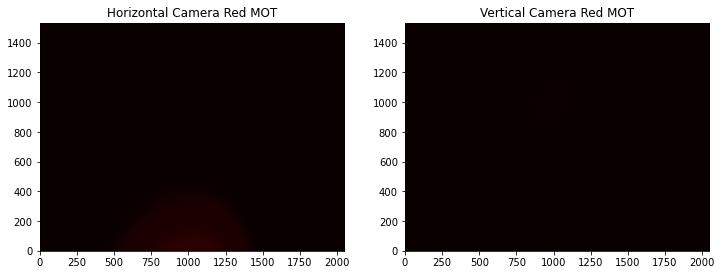

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

file_path = 'Z:/AION/Data/2024/11/13/nb_0A_all_bias_0A/data_22_00_13_13_11_2024.h5'

horizontal_camera_red_mot_data = extract_horizontal_camera_red_mot(file_path)
vertical_camera_red_mot_data = extract_vertical_camera_red_mot(file_path)

axes[0].imshow(horizontal_camera_red_mot_data, cmap='hot', origin='lower')
axes[0].set_title('Horizontal Camera Red MOT')

axes[1].imshow(vertical_camera_red_mot_data, cmap='hot', origin='lower')
axes[1].set_title('Vertical Camera Red MOT')

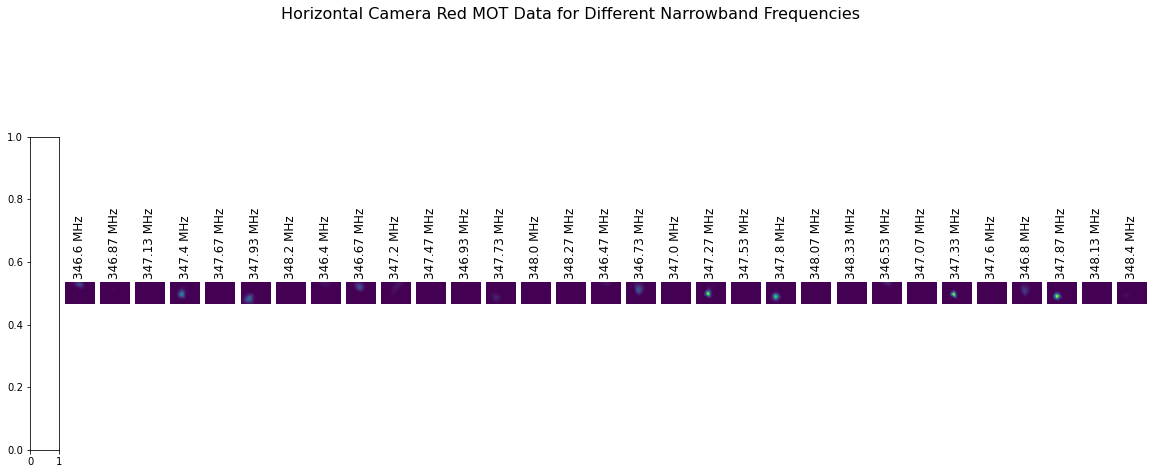

In [54]:
import h5py
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory containing all the .h5 files
directory_path = 'Z:/AION/Data/2024/11/13/nb_0A_all_bias_0A/'  # Replace with your directory path

# Initialize the plot (one row of subplots, many columns)
fig, axes = plt.subplots(1, 32, figsize=(20, 6))

# If there's only one file, axes is not a list but a single axis
if len(os.listdir(directory_path)) == 1:
    axes = [axes]

# Loop through all .h5 files in the directory
for idx, filename in enumerate(os.listdir(directory_path)):
    if filename.endswith('.h5') and "MeasureRedMOT" not in filename:
        file_path = os.path.join(directory_path, filename)

        try:
            # Open the .h5 file
            with h5py.File(file_path, 'r') as f:
                # Extract the parameter data
                parameters_data = f['parameters'][()]
                if isinstance(parameters_data, bytes):
                    parameters_dict = json.loads(parameters_data.decode('utf-8'))
                else:
                    parameters_dict = parameters_data
                
                # Extract the narrowband_fixed_phase_frequency and horizontal_camera_red_mot
                narrowband_frequency = parameters_dict['narrowband_fixed_phase_single']['narrowband_fixed_phase_frequency']
                horizontal_camera_red_mot_data = f['horizontal camera red mot'][()]
                
                # Plot the matrix as a color map using imshow
                im = axes[idx].imshow(horizontal_camera_red_mot_data, cmap='viridis')
                axes[idx].set_title(f'{np.round(narrowband_frequency/1e6,decimals=2)} MHz', rotation=90)
                axes[idx].axis('off')  # Hide axes ticks

                # Add colorbar only for the first subplot
                if idx == 0:
                    fig.colorbar(im, ax=axes[idx])

                # Rotate x-axis labels by 90 degrees
                axes[idx].tick_params(axis='x', rotation=90)

        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Add main title for the figure
plt.suptitle('Horizontal Camera Red MOT Data for Different Narrowband Frequencies', fontsize=16, y=1.15)

# Adjust layout to make room for colorbars
# plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top to accommodate the suptitle

# Show the plot
plt.show()


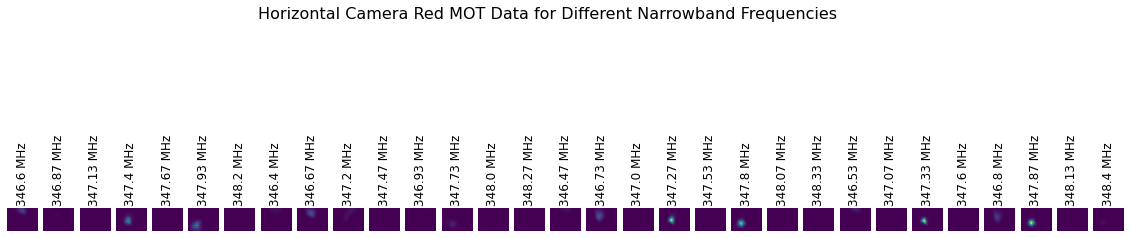

In [61]:
import h5py
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory containing all the .h5 files
directory_path = 'Z:/AION/Data/2024/11/13/nb_0A_all_bias_0A/'  # Replace with your directory path 

# Get the list of .h5 files, excluding "MeasureRedMOT" files
h5_files = [filename for filename in os.listdir(directory_path) 
            if filename.endswith('.h5') and "MeasureRedMOT" not in filename and "parameters" not in filename]

# Initialize the plot (one row of subplots, number of columns equal to the number of valid files)
fig, axes = plt.subplots(1, len(h5_files), figsize=(20, 6))

# If there is only one subplot, axes is not a list but a single axis
if len(h5_files) == 1:
    axes = [axes]

# Loop through all valid .h5 files
for idx, filename in enumerate(h5_files):
    file_path = os.path.join(directory_path, filename)

    try:
        # Open the .h5 file
        with h5py.File(file_path, 'r') as f:
            # Extract the parameter data
            parameters_data = f['parameters'][()]
            if isinstance(parameters_data, bytes):
                parameters_dict = json.loads(parameters_data.decode('utf-8'))
            else:
                parameters_dict = parameters_data
            
            # Extract the narrowband_fixed_phase_frequency and horizontal_camera_red_mot
            narrowband_frequency = parameters_dict['narrowband_fixed_phase_single']['narrowband_fixed_phase_frequency']
            horizontal_camera_red_mot_data = f['horizontal camera red mot'][()]
            
            # Plot the matrix as a color map using imshow
            im = axes[idx].imshow(horizontal_camera_red_mot_data, cmap='viridis')
            axes[idx].set_title(f'{np.round(narrowband_frequency/1e6, decimals=2)} MHz', rotation=90)
            axes[idx].axis('off')  # Hide axes ticks

            # # Add colorbar only for the first subplot
            # if idx == 0:
            #     fig.colorbar(im, ax=axes[idx])

            # Rotate x-axis labels by 90 degrees
            axes[idx].tick_params(axis='x', rotation=90)

    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Add main title for the figure
plt.suptitle('Horizontal Camera Red MOT Data for Different Narrowband Frequencies', fontsize=16)

# Adjust layout to make room for colorbars and suptitle
plt.subplots_adjust(top=0.85)  # Adjust the top to accommodate the suptitle

# Show the plot
plt.show()


In [ ]:
import h5py
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory containing all the .h5 files
directory_path = 'filepath_my_data'  # Replace with your directory path 

# Get the list of .h5 files, excluding "MeasureRedMOT" files
h5_files = [filename for filename in os.listdir(directory_path) 
            if filename.endswith('.h5') and "MeasureRedMOT" not in filename]

# Initialize the plot (one row of subplots, number of columns equal to the number of valid files)
fig, axes = plt.subplots(1, len(h5_files), figsize=(20, 6))

# If there is only one subplot, axes is not a list but a single axis
if len(h5_files) == 1:
    axes = [axes]

# Loop through all valid .h5 files
for idx, filename in enumerate(h5_files):
    file_path = os.path.join(directory_path, filename)

    try:
        # Open the .h5 file
        with h5py.File(file_path, 'r') as f:
            # Extract the parameter data
            parameters_data = f['parameters'][()]
            if isinstance(parameters_data, bytes):
                parameters_dict = json.loads(parameters_data.decode('utf-8'))
            else:
                parameters_dict = parameters_data
            
            # Extract the narrowband_fixed_phase_frequency and horizontal_camera_red_mot
            narrowband_frequency = parameters_dict['narrowband_fixed_phase_single']['narrowband_fixed_phase_frequency']
            horizontal_camera_red_mot_data = f['horizontal camera red mot'][()]
            
            # Plot the matrix as a color map using imshow
            im = axes[idx].imshow(horizontal_camera_red_mot_data, cmap='viridis')
            axes[idx].axis('off')  # Hide axes ticks

            # Set the narrowband_frequency on the x-axis
            axes[idx].set_xlabel(f'{np.round(narrowband_frequency/1e6, decimals=2)} MHz', fontsize=10)

            # # Add colorbar only for the first subplot
            # if idx == 0:
            #     fig.colorbar(im, ax=axes[idx])

            # Rotate x-axis labels by 90 degrees (for better readability if needed)
            axes[idx].tick_params(axis='x', rotation=90)

    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Add main title for the figure
plt.suptitle('Horizontal Camera Red MOT Data for Different Narrowband Frequencies', fontsize=16)

# Adjust layout to make room for colorbars and suptitle
plt.subplots_adjust(top=0.85)  # Adjust the top to accommodate the suptitle

# Show the plot
plt.show()